<a href="https://colab.research.google.com/github/Chintan-29/cardio_analysis/blob/main/cardio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('cardio_base.csv')

In [ ]:
df.head()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
0,0,18393,2,168,62.0,110,80,1,0
1,1,20228,1,156,85.0,140,90,3,0
2,2,18857,1,165,64.0,130,70,3,0
3,3,17623,2,169,82.0,150,100,1,0
4,4,17474,1,156,56.0,100,60,1,0


In [ ]:
df.count()

id             70000
age            70000
gender         70000
height         70000
weight         70000
ap_hi          70000
ap_lo          70000
cholesterol    70000
smoke          70000
dtype: int64

In [ ]:
df.nunique()

id             70000
age             8076
gender             2
height           109
weight           287
ap_hi            153
ap_lo            157
cholesterol        3
smoke              2
dtype: int64

In [ ]:
df['age_years'] = np.floor(df['age'] / 365)

In [ ]:
grouped_data = df.groupby('age_years')['weight'].mean()


In [ ]:
grouped_data

age_years
29.0    70.000000
30.0    59.000000
39.0    72.291573
40.0    70.914920
41.0    72.895849
42.0    71.681523
43.0    73.983161
44.0    72.731044
45.0    74.369430
46.0    72.717292
47.0    74.695753
48.0    74.163059
49.0    73.929353
50.0    73.065081
51.0    75.098530
52.0    73.432174
53.0    74.641262
54.0    73.982996
55.0    75.266728
56.0    74.268755
57.0    75.122789
58.0    74.619009
59.0    75.355207
60.0    74.004312
61.0    75.707111
62.0    74.047713
63.0    75.873721
64.0    74.619113
Name: weight, dtype: float64

In [ ]:
grouped_data.max()

75.87372076023392

In [ ]:
grouped_data.min()

59.0

In [ ]:
(75.87372076023392-59)/59

0.28599526712260886

In [ ]:
highest_avg_weight = grouped_data.idxmax()
lowest_weight = grouped_data.idxmin()


In [ ]:
print(highest_avg_weight)

63.0


In [ ]:
print(lowest_weight)

30.0


In [ ]:
df['age_years'] = np.floor(df['age'] / 365)

In [ ]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,age_years
0,0,18393,2,168,62.0,110,80,1,0,50.0
1,1,20228,1,156,85.0,140,90,3,0,55.0
2,2,18857,1,165,64.0,130,70,3,0,51.0
3,3,17623,2,169,82.0,150,100,1,0,48.0
4,4,17474,1,156,56.0,100,60,1,0,47.0
...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,52.0
69996,99995,22601,1,158,126.0,140,90,2,0,61.0
69997,99996,19066,2,183,105.0,180,90,3,0,52.0
69998,99998,22431,1,163,72.0,135,80,1,0,61.0


In [ ]:
df_over_50 = df[df['age_years'] > 50]
df_under_50 = df[df['age_years'] <= 50]


In [ ]:
df_over_50

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,age_years
1,1,20228,1,156,85.0,140,90,3,0,55.0
2,2,18857,1,165,64.0,130,70,3,0,51.0
5,8,21914,1,151,67.0,120,80,2,0,60.0
6,9,22113,1,157,93.0,130,80,3,0,60.0
7,12,22584,2,178,95.0,130,90,3,0,61.0
...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,52.0
69996,99995,22601,1,158,126.0,140,90,2,0,61.0
69997,99996,19066,2,183,105.0,180,90,3,0,52.0
69998,99998,22431,1,163,72.0,135,80,1,0,61.0


In [ ]:
avg_cholesterol_over_50 = df_over_50['cholesterol'].mean()
avg_cholesterol_under_50 = df_under_50['cholesterol'].mean()


In [ ]:
print(avg_cholesterol_over_50)

1.4313608815426997


In [ ]:
print(avg_cholesterol_under_50)

1.248040609137056


In [ ]:
(1.43-1.25)/1.25

0.14399999999999996

In [ ]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,age_years
0,0,18393,2,168,62.0,110,80,1,0,50.0
1,1,20228,1,156,85.0,140,90,3,0,55.0
2,2,18857,1,165,64.0,130,70,3,0,51.0
3,3,17623,2,169,82.0,150,100,1,0,48.0
4,4,17474,1,156,56.0,100,60,1,0,47.0
...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,52.0
69996,99995,22601,1,158,126.0,140,90,2,0,61.0
69997,99996,19066,2,183,105.0,180,90,3,0,52.0
69998,99998,22431,1,163,72.0,135,80,1,0,61.0


In [ ]:
df_men=df[df['gender']==1]
df_women=df[df['gender']==2]

In [ ]:
df_smoking_men = df_men[df_men['smoke'] == 1]
df_smoking_women = df_women[df_women['smoke'] == 1]


In [ ]:
df_men.count()

id             45530
age            45530
gender         45530
height         45530
weight         45530
ap_hi          45530
ap_lo          45530
cholesterol    45530
smoke          45530
age_years      45530
dtype: int64

In [ ]:
df_smoking_men.count()

id             813
age            813
gender         813
height         813
weight         813
ap_hi          813
ap_lo          813
cholesterol    813
smoke          813
age_years      813
dtype: int64

In [ ]:
813/45530*100

1.7856358444981333

In [ ]:
df_smoking_women.count()

id             5356
age            5356
gender         5356
height         5356
weight         5356
ap_hi          5356
ap_lo          5356
cholesterol    5356
smoke          5356
age_years      5356
dtype: int64

In [ ]:
df_women.count()

id             24470
age            24470
gender         24470
height         24470
weight         24470
ap_hi          24470
ap_lo          24470
cholesterol    24470
smoke          24470
age_years      24470
dtype: int64

In [ ]:
5356*100/24470

21.88802615447487

In [ ]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,age_years
0,0,18393,2,168,62.0,110,80,1,0,50.0
1,1,20228,1,156,85.0,140,90,3,0,55.0
2,2,18857,1,165,64.0,130,70,3,0,51.0
3,3,17623,2,169,82.0,150,100,1,0,48.0
4,4,17474,1,156,56.0,100,60,1,0,47.0


In [ ]:
height_cutoff = df['height'].quantile(0.99)


In [ ]:
height_cutoff

184.0

In [ ]:
from scipy.stats import spearmanr

In [ ]:
correlation_matrix, _ = spearmanr(df)

In [ ]:
correlation_df = pd.DataFrame(correlation_matrix, columns=df.columns, index=df.columns)
correlation_df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,age_years
id,1.000000,0.002682,0.003506,-0.001886,-0.001292,0.003258,-0.000238,0.005706,-0.003697,0.003002
age,0.002682,1.000000,-0.020176,-0.082292,0.061559,0.219087,0.156700,0.140113,-0.047471,0.999052
gender,0.003506,-0.020176,1.000000,0.533805,0.172480,0.063174,0.066374,-0.035730,0.338135,-0.020668
height,-0.001886,-0.082292,0.533805,1.000000,0.313569,0.019381,0.030534,-0.058940,0.197632,-0.083530
weight,-0.001292,0.061559,0.172480,0.313569,1.000000,0.277749,0.254420,0.137908,0.071676,0.062952
ap_hi,0.003258,0.219087,0.063174,0.019381,0.277749,1.000000,0.735436,0.208722,0.028929,0.220309
ap_lo,-0.000238,0.156700,0.066374,0.030534,0.254420,0.735436,1.000000,0.167401,0.026172,0.157768
cholesterol,0.005706,0.140113,-0.035730,-0.058940,0.137908,0.208722,0.167401,1.000000,0.015220,0.141571
smoke,-0.003697,-0.047471,0.338135,0.197632,0.071676,0.028929,0.026172,0.015220,1.000000,-0.047372
age_years,0.003002,0.999052,-0.020668,-0.083530,0.062952,0.220309,0.157768,0.141571,-0.047372,1.000000


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


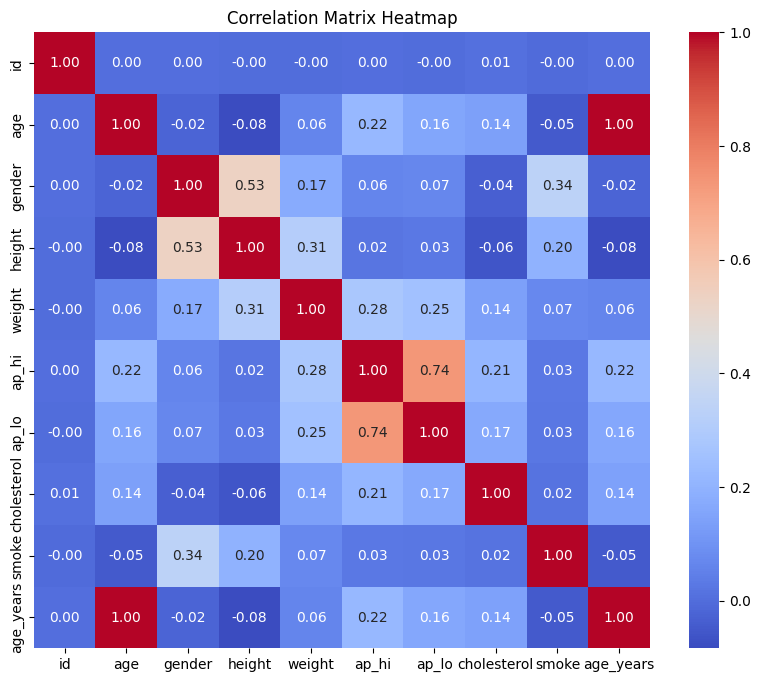

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_df, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [ ]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'smoke', 'age_years'],
      dtype='object')

In [ ]:
average_height = df['height'].mean()
std_dev_height = df['height'].std()


In [ ]:
upper_threshold = average_height + 2 * std_dev_height
lower_threshold = average_height - 2 * std_dev_height

In [ ]:
df_outliers = df[(df['height'] > upper_threshold) | (df['height'] < lower_threshold)]


In [ ]:
percentage_outliers = (len(df_outliers) / len(df)) * 100

In [ ]:
percentage_outliers

3.3357142857142854

In [ ]:
df1=pd.read_csv('cardio_alco.csv')

In [ ]:
df1.head()

,id;alco
0,44;0
1,45;0
2,46;0
3,47;0
4,49;0


In [ ]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,age_years
0,0,18393,2,168,62.0,110,80,1,0,50.0
1,1,20228,1,156,85.0,140,90,3,0,55.0
2,2,18857,1,165,64.0,130,70,3,0,51.0
3,3,17623,2,169,82.0,150,100,1,0,48.0
4,4,17474,1,156,56.0,100,60,1,0,47.0


In [ ]:
df1[['id', 'alco']] = df1['id;alco'].str.split(';', expand=True)


In [ ]:
df1 = df1.drop(columns=['id;alco'])

In [ ]:
df1

,id,alco
0,44,0
1,45,0
2,46,0
3,47,0
4,49,0
...,...,...
56898,99949,0
56899,99950,0
56900,99951,0
56901,99952,0


In [ ]:
df1.head()

,id,alco
0,44,0
1,45,0
2,46,0
3,47,0
4,49,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   age_years    70000 non-null  float64
dtypes: float64(2), int64(8)
memory usage: 5.3 MB


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56903 entries, 0 to 56902
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      56903 non-null  object
 1   alco    56903 non-null  object
dtypes: object(2)
memory usage: 889.2+ KB


In [ ]:
df1['id'] = df1['id'].astype(int)
df1['alco'] = df1['alco'].astype(int)

In [ ]:
merged_df=df.merge(df1, on='id', how='inner')

In [ ]:
merged_df.nunique()

id             56903
age             7917
gender             2
height           105
weight           258
ap_hi            148
ap_lo            147
cholesterol        3
smoke              2
age_years         28
alco               2
dtype: int64

In [ ]:
df2=merged_df[merged_df['age_years']>50]

In [ ]:
df2.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,age_years,alco
count,36874.000000,36874.000000,36874.000000,36874.000000,36874.000000,36874.000000,36874.000000,36874.000000,36874.000000,36874.000000,36874.000000
mean,48600.603650,20982.251424,1.339914,163.942426,74.665513,130.576233,99.639882,1.433802,0.079894,56.985356,0.049086
std,30989.969303,1397.578428,0.473686,8.211878,14.264911,131.258201,206.650942,0.733286,0.271132,3.843733,0.216051
min,45.000000,18619.000000,1.000000,55.000000,10.000000,-120.000000,-70.000000,1.000000,0.000000,51.000000,0.000000
25%,20483.500000,19752.000000,1.000000,158.000000,65.000000,120.000000,80.000000,1.000000,0.000000,54.000000,0.000000
50%,40896.000000,21014.000000,1.000000,164.000000,72.000000,120.000000,80.000000,1.000000,0.000000,57.000000,0.000000
75%,77149.750000,22000.000000,2.000000,169.000000,83.000000,140.000000,90.000000,2.000000,0.000000,60.000000,0.000000
max,99954.000000,23713.000000,2.000000,250.000000,183.000000,14020.000000,11000.000000,3.000000,1.000000,64.000000,1.000000


In [ ]:
df3=df2[df2['alco']==1]

In [ ]:
df3.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,age_years,alco
count,1810.000000,1810.000000,1810.000000,1810.000000,1810.000000,1810.000000,1810.000000,1810.000000,1810.000000,1810.000000,1810.0
mean,48380.755249,20862.400000,1.680110,167.139227,78.729834,133.162983,101.924862,1.561326,0.461326,56.662431,1.0
std,31157.137680,1377.281867,0.466562,8.450909,15.259240,43.471606,236.363489,0.778971,0.498640,3.795836,0.0
min,81.000000,18686.000000,1.000000,112.000000,22.000000,12.000000,0.000000,1.000000,0.000000,51.000000,1.0
25%,20809.000000,19697.500000,1.000000,161.000000,69.000000,120.000000,80.000000,1.000000,0.000000,53.000000,1.0
50%,40360.000000,20654.000000,2.000000,168.000000,77.000000,130.000000,80.000000,1.000000,0.000000,56.000000,1.0
75%,76830.500000,21893.000000,2.000000,173.000000,87.000000,140.000000,90.000000,2.000000,1.000000,59.000000,1.0
max,99933.000000,23667.000000,2.000000,207.000000,183.000000,1300.000000,9011.000000,3.000000,1.000000,64.000000,1.0


In [ ]:
smokers = merged_df[merged_df['smoke'] == 1]
non_smokers = merged_df[merged_df['smoke'] == 0]

In [ ]:
from scipy.stats import ttest_ind

t_statistic, p_value = ttest_ind(smokers['weight'], non_smokers['weight'], equal_var=False)


In [ ]:
p_value

2.737107727624767e-55

In [ ]:
t,p=ttest_ind(df_men['ap_hi'], df_women['ap_hi'], equal_var=False)
p

0.1038392595181402